In [2]:
%load_ext autoreload
%autoreload 2
%load_ext lab_black

In [3]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import sys
import yaml

sys.path.append("../")

from utils.dataset import DIV2K_Dataset
from utils.model import create_model
from utils.constants import HR_IMG_SIZE, DOWNSAMPLE_MODE

## Parameters

In [66]:
with open("config.yaml", "r") as f:
    config = yaml.safe_load(f)

config

{'data_path': 'data/DIV2K_train_valid_HR/',
 'model_d': 56,
 'model_s': 12,
 'model_m': 4,
 'lr_init': 0.001,
 'epochs': 3000,
 'batch_size': 30,
 'steps_per_epoch': 20,
 'val_batch_size': 20,
 'validation_steps': 4,
 'weights_fn': 'weights/model_{epoch:05d}.h5'}

In [5]:
model = keras.models.load_model("weights/model_00072.h5")

# Evaluation

### Validation Set

In [44]:
val_dataset = DIV2K_Dataset(
    hr_image_folder=config["data_path"],
    batch_size=config["val_batch_size"],
    set_type="val",
)

In [45]:
psnrs = []

for batch in val_dataset:
    preds = model.predict(batch[0])
    psnr = tf.image.psnr(batch[1], preds, max_val=1.0)
    psnr = psnr.numpy().tolist()
    psnrs.extend(psnr)

print("Mean PSNR: {:.3f}".format(np.mean(psnrs)))

Mean PSNR: 24.291


### Test Set

In [24]:
test_dataset = DIV2K_Dataset(
    hr_image_folder=config["data_path"],
    batch_size=config["val_batch_size"],
    set_type="test",
)

In [42]:
psnrs = []

for batch in test_dataset:
    preds = model.predict(batch[0])
    psnr = tf.image.psnr(batch[1], preds, max_val=1.0)
    psnr = psnr.numpy().tolist()
    psnrs.extend(psnr)

print("Mean PSNR: {:.3f}".format(np.mean(psnrs)))

Mean PSNR: 24.654


# Visualization

### Test Set

In [59]:
batch_id = 0
batch = val_dataset.__getitem__(batch_id)
preds = model.predict(batch[0])

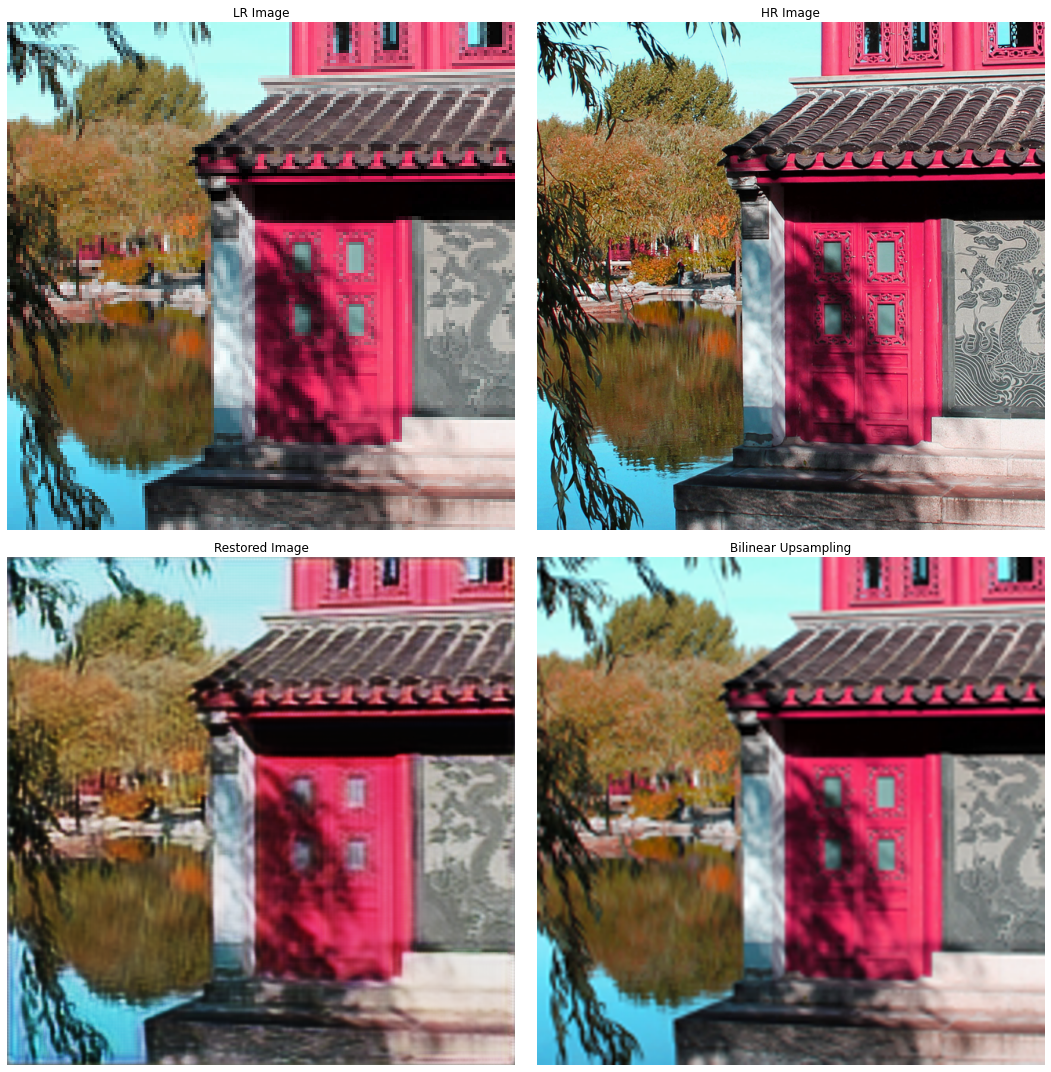

In [62]:
img_id = 0

plt.figure(figsize=[15, 15])
plt.subplot(2, 2, 1)
plt.imshow(batch[0][img_id])
plt.axis("off")
plt.title("LR Image")

plt.subplot(2, 2, 2)
plt.imshow(batch[1][img_id])
plt.axis("off")
plt.title("HR Image")

plt.subplot(2, 2, 3)
plt.imshow(preds[img_id])
plt.axis("off")
plt.title("Restored Image")


plt.subplot(2, 2, 4)
lr_image = Image.fromarray(np.array(batch[0][img_id] * 255, dtype="uint8"))
lr_image_resized = lr_image.resize(HR_IMG_SIZE, resample=DOWNSAMPLE_MODE)
plt.imshow(lr_image_resized)
plt.axis("off")
plt.title("Bilinear Upsampling")

plt.tight_layout()
plt.show()